# Sample 4A-1 Interpolation and extrapolation

## Interpolation provided by scipy

-linear interpolation "interp1d"
-cubic spline interpolation "interp1d" with kind='cubic'
-polynomial interpolations "KnoghInterpolator" and "BarycentricInterpolator"

C:\Users\HONOR\AppData\Local\Temp/ipykernel_22404/632234466.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


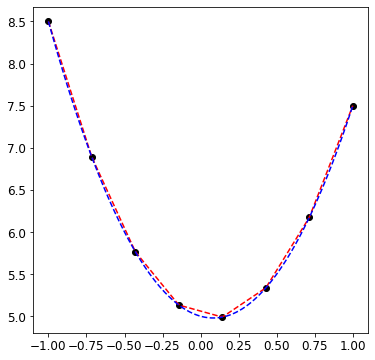

In [3]:
%matplotlib inline
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib
from scipy.interpolate import interp1d
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 

def func1(x1):
    return 3.*x1**2-0.5*x1+5.
    
x1 = np.linspace(-1, 1, 8)
y1 = func1(x1)
x2 = np.linspace(-1,1,100)

f = interp1d(x1, y1)
f3 = interp1d(x1, y1,kind='cubic')

fig = plt.figure(figsize=[6,6])
ax = fig.add_subplot(111)
ax.plot(x1, func1(x1),'ko')
ax.plot(x2, f(x2),'r--')
ax.plot(x2, f3(x2),'b--')

fig.show()

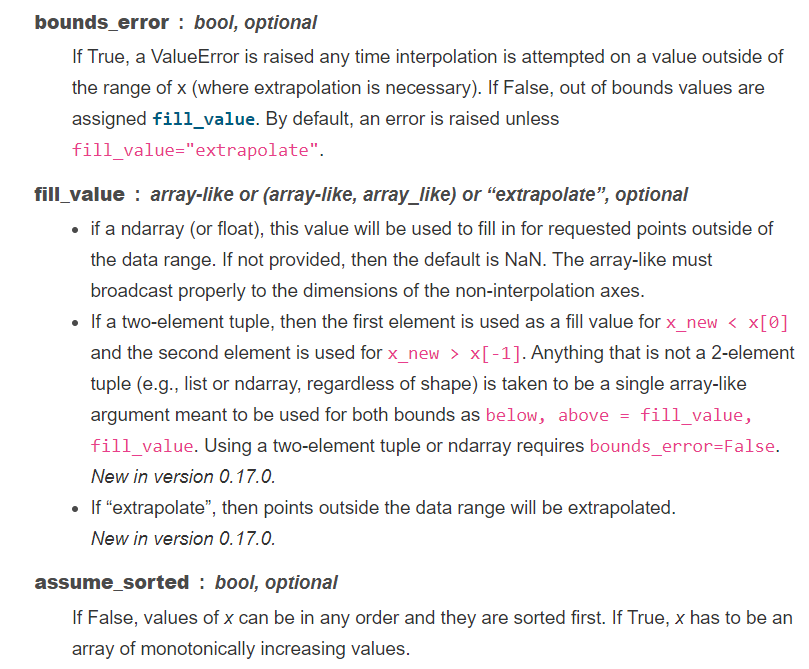

## polynomial interpolation

C:\Users\HONOR\AppData\Local\Temp/ipykernel_22404/2791983480.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\HONOR\AppData\Local\Temp/ipykernel_22404/2791983480.py:39: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


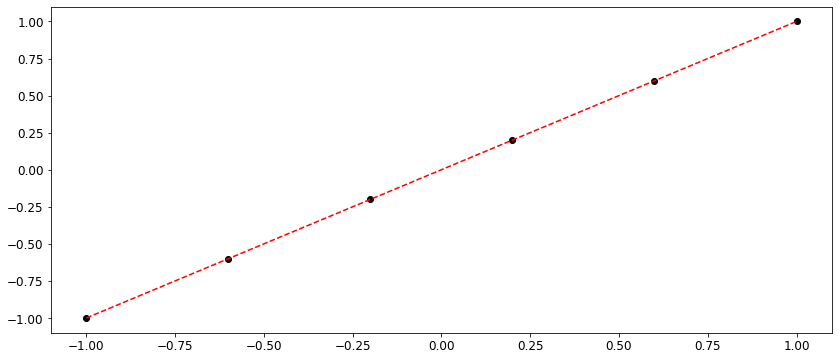

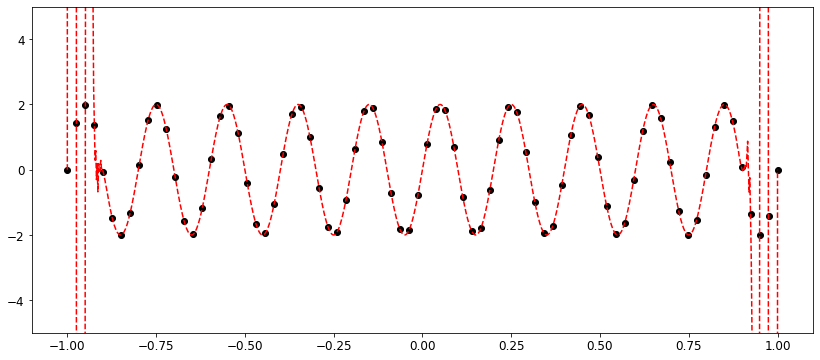

In [2]:
def poly_interp(xi,yi, x):
    n = len(xi)
    P = yi
    for i in range(1,n):
        m = n-i
        PP = np.zeros(m)
        for j in range(m):
            PP[j] = ((x-xi[j+i])*P[j]+(xi[j]-x)*P[j+1])/(xi[j]-xi[j+i])
        #print(PP)
        P = PP    
    return P[0]
################################ sample 1
x = np.linspace(-1,1,6)
y =x

x2 = np.linspace(-1,1,1000)
z = np.array([poly_interp(x,y,x0) for x0 in x2])
fig = plt.figure(figsize=[14,6])
ax = fig.add_subplot(111)
ax.plot(x, y,'ko')
ax.plot(x2,z,'r--')

fig.show()

################################ sample 2
def func1(x1):
    return np.sin(x1*np.pi*10.)*2.

x = np.linspace(-1,1,80)
y = func1(x)

x2 = np.linspace(-1,1,1000)
z = np.array([poly_interp(x,y,x0) for x0 in x2])
fig = plt.figure(figsize=[14,6])
ax = fig.add_subplot(111)
ax.plot(x, func1(x),'ko')
ax.plot(x2,z,'r--')
ax.set_ylim([-5,5])
fig.show()

## Krogh Interpolation 

C:\Users\HONOR\AppData\Local\Temp/ipykernel_16528/2674232611.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


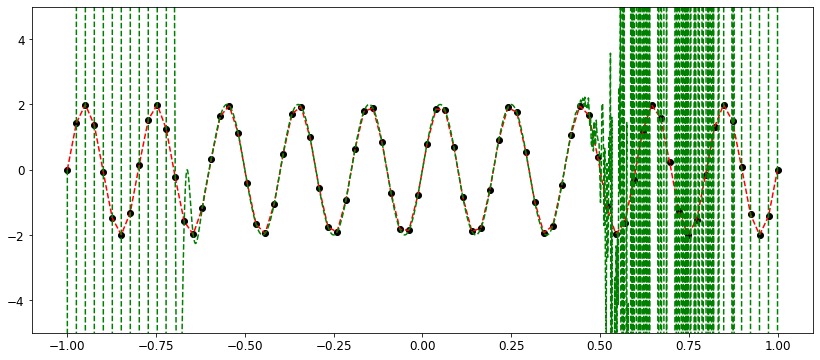

In [67]:
from scipy.interpolate import KroghInterpolator as kp


x1 = np.linspace(-1, 1, 80)
y1 = func1(x1)
fk = kp(x1,y1)

x2 = np.linspace(-1,1,1000)

f = interp1d(x1, y1)
f3 = interp1d(x1, y1,kind='cubic')

fig = plt.figure(figsize=[14,6])
ax = fig.add_subplot(111)
ax.plot(x1, func1(x1),'ko')
ax.plot(x2, f(x2),'r--')
ax.plot(x2,fk(x2),'g--')
ax.set_ylim([-5,5])
fig.show()

## Barycentric Interpolation

D:\Anaconda3\lib\site-packages\scipy\interpolate\polyint.py:643: RuntimeWarning: divide by zero encountered in true_divide
  p = np.dot(c,self.yi)/np.sum(c,axis=-1)[...,np.newaxis]
C:\Users\HONOR\AppData\Local\Temp/ipykernel_16528/977639805.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


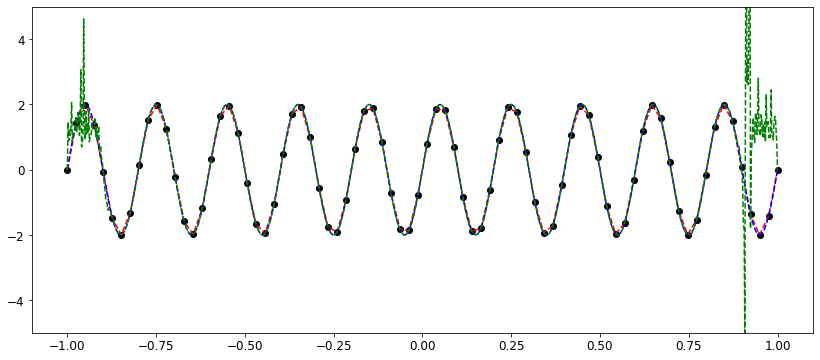

In [66]:
from scipy.interpolate import BarycentricInterpolator as bp
def func1(x1):
    return np.sin(x1*np.pi*10.)*2.

x1 = np.linspace(-1, 1, 80)
y1 = func1(x1)
fb = bp(x1,y1)

x2 = np.linspace(-1,1,1000)

f = interp1d(x1, y1)
f3 = interp1d(x1, y1,kind='cubic')

fig = plt.figure(figsize=[14,6])
ax = fig.add_subplot(111)
ax.plot(x1, func1(x1),'ko')
ax.plot(x2, f(x2),'r--')
ax.plot(x2,f3(x2),'b--')
ax.plot(x2,fb(x2),'g--')
ax.set_ylim([-5,5])
fig.show()

## Multi-variate linear interpolation

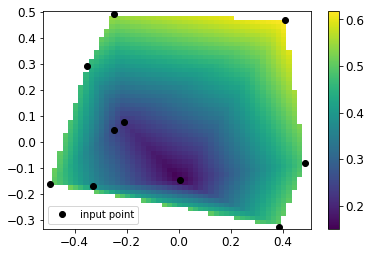

In [107]:
from scipy.interpolate import LinearNDInterpolator as lp

rng = np.random.default_rng()
x = rng.random(10) - 0.5
y = rng.random(10) - 0.5
z = np.hypot(x, y)
X = np.linspace(min(x), max(x))
Y = np.linspace(min(y), max(y))
X, Y = np.meshgrid(X, Y)  # 2D grid for interpolation
interp = LinearNDInterpolator(list(zip(x, y)), z)
Z = interp(X, Y)
plt.pcolormesh(X, Y, Z, shading='auto')
plt.plot(x, y, "ok", label="input point")
plt.legend()
plt.colorbar()
plt.axis("equal")
plt.show()

## Multi-variate interpolation on a regular grid

In [109]:
from scipy.interpolate import RegularGridInterpolator
def f(x, y, z):
    return 2 * x**3 + 3 * y**2 - z
x = np.linspace(1, 4, 11)
y = np.linspace(4, 7, 22)
z = np.linspace(7, 9, 33)
xg, yg ,zg = np.meshgrid(x, y, z, indexing='ij', sparse=True)
data = f(xg, yg, zg)

my_interpolating_function = RegularGridInterpolator((x, y, z), data)
pts = np.array([[2.1, 6.2, 8.3], [3.3, 5.2, 7.1]])
my_interpolating_function(pts)

array([125.80469388, 146.30069388])

## Multi-variate interpolation with scattered points

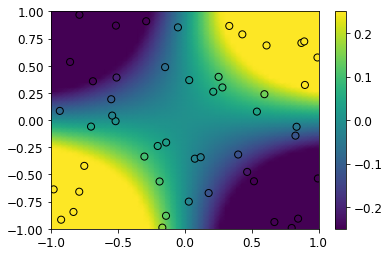

In [136]:
import matplotlib.pyplot as plt
from scipy.interpolate import RBFInterpolator

x = np.random.rand(50)*2 - 1.
y = np.random.rand(50)*2 - 1.
d = np.concatenate((x.reshape(50,1),y.reshape(50,1)),axis=1)
z =x*y
xgrid = np.mgrid[-1:1:50j,-1:1:50j]

xflat = xgrid.reshape(2, -1).T
yflat = RBFInterpolator(d,z)(xflat)
ygrid = yflat.reshape(50, 50)

fig, ax = plt.subplots()
ax.pcolormesh(*xgrid, ygrid, vmin=-0.25, vmax=0.25, shading='gouraud')
p = ax.scatter(*d.T, c=z, s=50, ec='k', vmin=-0.25, vmax=0.25)
fig.colorbar(p)
plt.show()

## Install regli
 pip install -U regli

In [1]:
## test of regli by Zhang Bo
from regli import test
test()

regli.interp3 x 10000: 0.26903343200683594 sec
regli.interpn x 10000: 1.2490451335906982 sec
rgi x 10000: 2.0511093139648438 sec


In [23]:
# import Regli
from regli import Regli
import numpy as np

# construct grid coordinates
x1 = np.linspace(-1, 1, 30)     
x2 = np.linspace(-1, 1, 30)
x3 = np.linspace(-1, 1, 30)

# initiate regli using coordinates
regli = Regli(x1, x2, x3)

def func(x1, x2, x3):
    return x1**3+x2**2*x1+x1**2*x2+x3**3

# regli.flats stores flattened coordinates of ND grid
flats = regli.flats
# evaluate your function on flats
values = np.array([func(*_) for _ in flats]).reshape(-1, 1)
# set values for regli
regli.set_values(values)        

pos = [0.72, -0.0124, -0.985]
regli(pos)                      # use any of the 3 ways to interpolate
print(regli.interpn(pos))            # method 1 is equivalent to 2
print(regli.interp3(pos))            # this is accelerated for 3D

[-0.58979632]
[-0.58979632]
